# This notebook is to clean up a messy and chaotic FIFA 2021 Players dataset.

### 0. Import necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## 1. Load and explore the dataset:

In [2]:
path_to_data = '/kaggle/input/fifa/fifa21_raw_data.csv'
data = pd.read_csv(path_to_data)

C:\Users\Hussein\AppData\Local\Temp\ipykernel_28964\1602969259.py:3: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path_to_data)


In [3]:
data.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,...,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,...,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,...,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,...,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,...,High,Medium,5 ★,91,85,86,94,36,59,\n273


In [4]:
data.shape

(18979, 77)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   photoUrl          18979 non-null  object
 1   LongName          18979 non-null  object
 2   playerUrl         18979 non-null  object
 3   Nationality       18979 non-null  object
 4   Positions         18979 non-null  object
 5   Name              18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Team & Contract   18979 non-null  object
 10  ID                18979 non-null  int64 
 11  Height            18979 non-null  object
 12  Weight            18979 non-null  object
 13  foot              18979 non-null  object
 14  BOV               18979 non-null  int64 
 15  BP                18979 non-null  object
 16  Growth            18979 non-null  int64 
 17  Joined      

## 1. Convert Height and Weight to appropriate data types:

### Before Conversion:

In [6]:
height = data['Height'][0]
print(height)
print(type(height))
print(data['Weight'][0])

5'7"
<class 'str'>
159lbs


### Conversion:

In [7]:
for i, row in data.iterrows():
    height = row['Height'].replace('"', '')
    feet, inches = height.split("'") 
    
    # Convert feet to inches and add the remaining inches
    total_inches = (float(feet) * 12) + float(inches)
    # Convert inches to centimeters
    cm = total_inches * 2.54
    data.loc[i, 'Height'] = int(cm)                     # convert string to float data type

    
for i, row in data.iterrows():
    weight = row['Weight'].replace("'", ".").replace("lbs", "")  # remove '  and  remove lbs
    data.loc[i, 'Weight'] = int(weight)                     # convert string to integer data type

print('Height and Weight were converted successfully.')    

Height and Weight were converted successfully.


### After Conversion:

In [8]:
data[['Height', 'Weight']]

,Height,Weight
0,170,159
1,187,183
2,187,192
3,180,154
4,175,150
...,...,...
18974,177,154
18975,170,128
18976,177,146
18977,175,143


## 2. Separate the Joined column into Year, Month and Day columns:
### The Joined column has the form of: 'MMM D, YYY'

### Before:

In [9]:
data['Joined'][0]

'Jul 1, 2004'

In [10]:
# Convert the 'Joined' column into datetime format and then extract the required components
data['Joined'] = pd.to_datetime(data['Joined'], format='%b %d, %Y')

# Extract Year, Month, and Day
data['Year'] = data['Joined'].dt.year
data['Month'] = data['Joined'].dt.month_name().str[:3]  # Full month name or abbreviations
data['Day'] = data['Joined'].dt.day
print('Split done sucessfully.')

Split done sucessfully.


### After Split:

In [11]:
data[['Year','Month' ,'Day']]

,Year,Month,Day
0,2004,Jul,1
1,2018,Jul,10
2,2014,Jul,16
3,2015,Aug,30
4,2017,Aug,3
...,...,...,...
18974,2020,Aug,1
18975,2020,Aug,1
18976,2018,Jul,13
18977,2020,Aug,1


## 3. Clean and transform the Wage, Value, and Release Clause columns into columns of integers:

### Before Transformation:

In [12]:
print(data['Wage'][10]) # all in € and in thousands (k)
print(data['Value'][100])  # all in €, but either in M or K
print(data['Release Clause'][1000])  # all in €, but either in M or K

€210K
€44.5M
€8.6M


### Transformation:
#### Steps:
1. read cloumn of interest, 
2. extract the unit, whether K or M, represented in the last character   
3. extract numeric content which is located after the first character and before the last character,
4. if unit is K then multiply by 1,000, else if M then multiply by 1,000,000

In [13]:
data['Value'] = data['Value'].str.replace('€','')
data['Wage'] = data['Value'].str.replace('€','')
data['Release Clause'] = data['Release Clause'].str.replace('€','')

def transform_data(value):
    
    if isinstance(value, str):
        if 'M' in value:
            return float(value.replace('€', '').replace('M', '')) * 1e6
        elif 'K' in value:
            return float(value.replace('€', '').replace('K', '')) * 1e3
        else:
            return float(value.replace('€', ''))       
        
    return value

In [14]:
data['Wage'] = data['Wage'].apply(transform_data)
data['Value'] = data['Value'].apply(transform_data)
data['Release Clause'] = data['Release Clause'].apply(transform_data)

### After Transformation:

In [15]:
print(data['Wage'][10]) 
print(data['Value'][100])  
print(data['Release Clause'][1000])  

75500000.0
44500000.0
8600000.0


## 4. Remove the newline characters from the Hits column:

### Before removal:

In [16]:
data['Hits'].head()

0    \n372
1    \n344
2     \n86
3    \n163
4    \n273
Name: Hits, dtype: object

### Removal:

In [17]:
#  remove only the leading '\n'
data['Hits'] = data['Hits'].str.lstrip('\n')

### After Removal:

In [18]:
data['Hits'].head()

0    372
1    344
2     86
3    163
4    273
Name: Hits, dtype: object

## 5. Separate the Team & Contract column into Team and Contract columns:

### Before:

In [19]:
data['Team & Contract'].head()

0           \n\n\n\nFC Barcelona\n2004 ~ 2021\n\n
1               \n\n\n\nJuventus\n2018 ~ 2022\n\n
2        \n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n
3        \n\n\n\nManchester City\n2015 ~ 2023\n\n
4    \n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n
Name: Team & Contract, dtype: object

### Split:

In [20]:
# Step 1: Strip leading and trailing newlines
Team_Contract = data['Team & Contract'].str.strip()

# Step 2: Split the string into Team and Contract using the newline character as the delimiter
split_columns = Team_Contract.str.split('\n', n=1, expand=True)

# Assign the new columns
data['Team'] = split_columns[0]
data['Contract'] = split_columns[1]

### After:

In [21]:
print(data[['Team', 'Contract']].head())

                  Team     Contract
0         FC Barcelona  2004 ~ 2021
1             Juventus  2018 ~ 2022
2      Atlético Madrid  2014 ~ 2023
3      Manchester City  2015 ~ 2023
4  Paris Saint-Germain  2017 ~ 2022


## 6. Some columns have 'star' characters. Strip those columns of these stars and make the columns numerical:

### Before:

In [22]:
print(data[['IR', 'SM', 'W/F']].head())

    IR  SM  W/F
0  5 ★  4★  4 ★
1  5 ★  5★  4 ★
2  3 ★  1★  3 ★
3  4 ★  4★  5 ★
4  5 ★  5★  5 ★


### Manipulation:

In [23]:
for i, row in data[['IR', 'SM', 'W/F']].iterrows():
    data['IR'] = int(row['IR'][0])
    data['SM'] = int(row['SM'][0])
    data['W/F'] = int(row['W/F'][0])
    

### After:

In [24]:
data[['IR', 'SM', 'W/F']]

,IR,SM,W/F
0,1,2,3
1,1,2,3
2,1,2,3
3,1,2,3
4,1,2,3
...,...,...,...
18974,1,2,3
18975,1,2,3
18976,1,2,3
18977,1,2,3


### 7. Drop unnecessary columns:

In [25]:
data.drop(['photoUrl', 'LongName', 'playerUrl', 'Team & Contract'], axis=1, inplace=True)

### 8. Fix naming convention:

In [26]:
data = data.rename(columns={'foot': 'Foot'})

### 9. Check for duplicates:

In [27]:
print('Duplicates: ', data.duplicated().sum() )
if data.duplicated().sum() > 0:
    data.drop_duplicates(inplace=True)
    print('Removed Duplicates.')
    
print('Duplicates: ', data.duplicated().sum() )

Duplicates:  1
Removed Duplicates.
Duplicates:  0


### 10. Check for missing values:

In [28]:
data.isna().sum()

Nationality    0
Positions      0
Name           0
Age            0
↓OVA           0
              ..
Year           0
Month          0
Day            0
Team           0
Contract       0
Length: 78, dtype: int64

### 9. Which players are highly valuable but still underpaid (on low wages)?

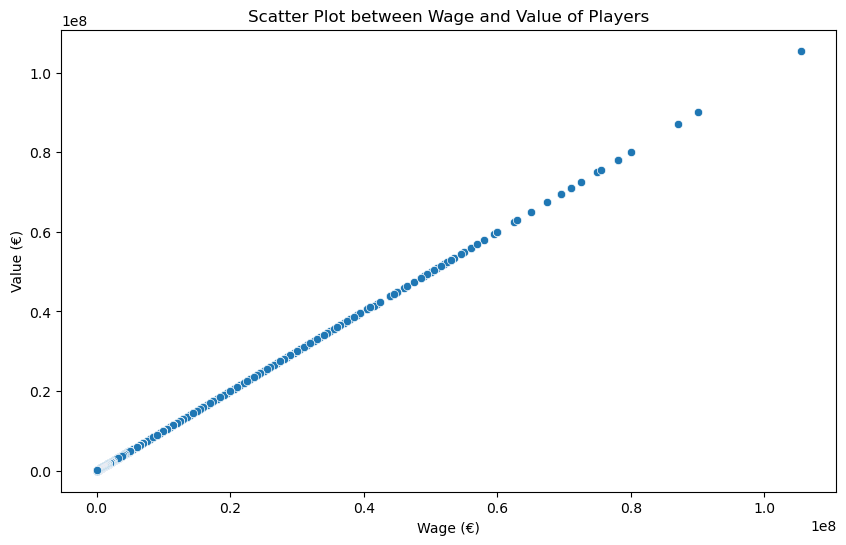

In [29]:
x = data['Wage']
y = data['Value']

# Create a scatter plot using seaborn
plt.figure(figsize=(10,6))
sns.scatterplot(x=x, y=y)
plt.title('Scatter Plot between Wage and Value of Players')
plt.xlabel('Wage (€)')
plt.ylabel('Value (€)')

# Show the plot
plt.show()


### 10. Check which players have been playing at a club for more than 10 years!

In [30]:
current_year = datetime.now().year
data['Years_At_Club'] = current_year - data['Year']

In [31]:
players_more_than_10_years = data[data['Years_At_Club'] > 10]
players_more_than_10_years[['Name', 'Joined', 'Years_At_Club']].set_index('Name')

,Joined,Years_At_Club
Name,,
L. Messi,2004-07-01,20
Casemiro,2013-07-11,11
M. Neuer,2011-07-01,13
K. Benzema,2009-07-09,15
Sergio Ramos,2005-08-01,19
...,...,...
Yao Hanlin,2010-01-01,14
O. Al Sunain,2013-07-01,11
Chang Feiya,2013-01-01,11
